In [ ]:
import pandas as pd #Dataframe Manipulation library
import numpy as np #Data Manipulation library

#sklearn modules for Feature Extraction & Modelling
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
from sklearn import svm
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

#Libraries for Plotting 
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
import seaborn as sns
sns.set(color_codes=True)

from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import joblib

In [ ]:
df_train = pd.read_csv("train.csv")
df_train.rename(columns = {'id':'tweet_ID','target':'real_disaster'}, inplace = True)
df_train.head(5)

,tweet_ID,keyword,location,text,real_disaster
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [ ]:
print("\n The Dataset Statistics :")
df_train.describe(include = 'all')


 The Dataset Statistics :


,tweet_ID,keyword,location,text,real_disaster
count,7613.000000,7552,5080,7613,7613.00000
unique,NaN,221,3341,7503,NaN
top,NaN,fatalities,USA,11-Year-Old Boy Charged With Manslaughter of T...,NaN
freq,NaN,45,104,10,NaN
mean,5441.934848,NaN,NaN,NaN,0.42966
std,3137.116090,NaN,NaN,NaN,0.49506
min,1.000000,NaN,NaN,NaN,0.00000
25%,2734.000000,NaN,NaN,NaN,0.00000
50%,5408.000000,NaN,NaN,NaN,0.00000
75%,8146.000000,NaN,NaN,NaN,1.00000


In [ ]:
df_train.isnull().sum() #checking for missing values for entire dataset

tweet_ID            0
keyword            61
location         2533
text                0
real_disaster       0
dtype: int64

In [ ]:
#print("\nDropping rows having missing values")
df_train.dropna(subset = ["text","real_disaster"], inplace = True) #dropping rows with missing values only in specific columns
print(f"Size of the dataframe : {df_train.shape}")

Size of the dataframe : (7613, 5)


In [ ]:
#Viewing the records which reflect disaster related tweets
df_train.loc[df_train["real_disaster"]==1][:5]

,tweet_ID,keyword,location,text,real_disaster
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [ ]:
#Creating a list of text belonging to individual tweets

text_disaster = df_train[df_train["real_disaster"]==1]["text"] #Extracting the texts of the tweets which reflect real disaster
#print(text_disaster)
collapsed_text_disaster = text_disaster.str.cat(sep = ' ') #Combining all the disaster tweet texts in one large text
#print(collapsed_text_disaster)

text_nondisaster = df_train[df_train["real_disaster"]==0]["text"] #Extracting the texts of the tweets which reflect disaster has not occurred
collapsed_text_nondisaster = text_nondisaster.str.cat(sep = ' ') #Combining all the non disaster tweet texts in one large text

In [ ]:
text_disaster.shape

(3271,)

In [ ]:
collapsed_text_nondisaster

"What's up man? I love fruits Summer is lovely My car is so fast What a goooooooaaaaaal!!!!!! this is ridiculous.... London is cool ;) Love skiing What a wonderful day! LOOOOOOL No way...I can't eat that shit Was in NYC last week! Love my girlfriend Cooool :) Do you like pasta? The end! We always try to bring the heavy. #metal #RT http://t.co/YAo1e0xngw Crying out for more! Set me ablaze On plus side LOOK AT THE SKY LAST NIGHT IT WAS ABLAZE http://t.co/qqsmshaJ3N @PhDSquares #mufc they've built so much hype around new acquisitions but I doubt they will set the EPL ablaze this season. Ablaze for you Lord :D Check these out: http://t.co/rOI2NSmEJJ http://t.co/3Tj8ZjiN21 http://t.co/YDUiXEfIpE http://t.co/LxTjc87KLS #nsfw on the outside you're ablaze and alive\nbut you're dead inside Had an awesome time visiting the CFC head office the ancop site and ablaze. Thanks to Tita Vida for taking care of us ?? SOOOO PUMPED FOR ABLAZE ???? @southridgelife I wanted to set Chicago ablaze with my pre

In [ ]:
#Creating List of Stopwords
stopwords = set(STOPWORDS)
stopwords.update(['http','https', 'via','t','co','RT','new', 'amp'])

Words occurring frequently in the corpus form a Word Cloud
Words with higher frequency have larger font
Visualization to understand the topic in discussion in the given text


Word Cloud for Disaster Related Tweets


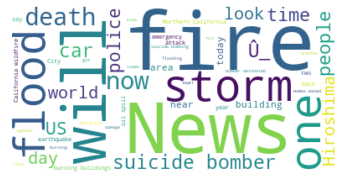


Word Cloud for Non Disaster Tweets


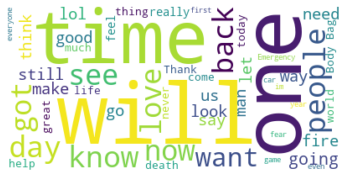

In [ ]:
print('\033[1m'"\nWord Cloud for Disaster Related Tweets"'\033[0m')
#Generate a Word Cloud for Disaster Related Tweets
wordcloud = WordCloud(stopwords=stopwords, background_color='white', max_words=50).generate(collapsed_text_disaster)#Initializing the Word Cloud Class
#Display the generated Word cloud as image
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


print('\033[1m'"\nWord Cloud for Non Disaster Tweets"'\033[0m')
#Generate a Word Cloud for Non Disaster Tweets
wordcloud = WordCloud(stopwords=stopwords, background_color='white', max_words=50).generate(collapsed_text_nondisaster)#Initializing the Word Cloud Class
#Display the generated Word cloud as image
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

Splitting the training dataset into training & test Data

In [ ]:
df_train.real_disaster.value_counts()

0    4342
1    3271
Name: real_disaster, dtype: int64

As the target count is relatively similar without high differences so the dataset seems to be balanced

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(df_train['text'],df_train['real_disaster'],
                                                    random_state=42, test_size=0.2)

print(f"Size of \n input training data : {x_train.shape} \n input test data : {x_test.shape} \n output training data : {y_train.shape} \n output test data : {y_test.shape}")

Size of 
 input training data : (6090,) 
 input test data : (1523,) 
 output training data : (6090,) 
 output test data : (1523,)


Naive Bayes Model
Preprocessing & Transforming the Text Data

In [ ]:
#Building pipeline for raw text transformation
clf_NB = Pipeline([
    ('vect', CountVectorizer(stop_words='english')),
    #('tfidf', TfidfTransformer()), #transform the data and extract the meaning of given tweets 
    #which are rare in overall corpus and are specific to given tweets
    ('classifier', MultinomialNB()), #Apply the transformed data to Multinomial Naive Bayes Algo
])

Training the baseline model i.e. Naive Bayes Model

In [ ]:
model_NB = clf_NB.fit(x_train,y_train) #fit the clf pipeline to training data

In [ ]:
#Accuracy of the Naive Bayes Model
mdl_score_NB = "{:.2f}".format(model_NB.score(x_test,y_test)*100 )
print(f"The Accuracy of the Naive Bayes Classifier Model is {mdl_score_NB}%")
#print(f"\n{mdl_score_NB}% of the times the model predicts the correct category for the tweets")

The Accuracy of the Naive Bayes Classifier Model is 78.79%


HyperParameter Tuning

In [ ]:
param_grid = {
    'vect__ngram_range':[(1,1), (1,2),(1,3)],
    'classifier__fit_prior' :[True, False]
}

grid_search_NB = GridSearchCV(clf_NB, param_grid, cv = 3, verbose = 1, n_jobs = -1)
grid_search_NB.fit(x_train, y_train)

Fitting 3 folds for each of 6 candidates, totalling 18 fits


GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('vect',
                                        CountVectorizer(stop_words='english')),
                                       ('classifier', MultinomialNB())]),
             n_jobs=-1,
             param_grid={'classifier__fit_prior': [True, False],
                         'vect__ngram_range': [(1, 1), (1, 2), (1, 3)]},
             verbose=1)

Fitting 3 folds for each of 6 candidates, totalling 18 fits

ngram_range
each unique word becomes features once we split using tokenizer

bigrams : Two words together : New York
Trigrams : The Times of India
Scikit will create a set of words either as unique single words or conjuction words having bigrams or trigrams
Increasing feature space beyong (1,3) may cause overfitting

In [ ]:
gs_score_NB = "{:.2f}".format(grid_search_NB.score(x_test,y_test)*100 )
print(f"Accuracy  of the prediction on test data is {gs_score_NB}%")
# Printing the best combination of hyper parameters
print("\nOptimum setting of hyperparameters:\n")
grid_search_NB.best_params_

Accuracy  of the prediction on test data is 78.73%

Optimum setting of hyperparameters:



{'classifier__fit_prior': True, 'vect__ngram_range': (1, 3)}

Support Vector Machine

In [ ]:
#Building pipeline for raw text transformation
clf_SVC = Pipeline([
    ('vect', CountVectorizer(stop_words='english')),
    ('tfidf', TfidfTransformer()), #transform the data and extract the meaning of given tweets 
    #which are rare in overall corpus and are specific to given tweets
    ('classifier', svm.SVC()), #Apply the transformed data to Multinomial Naive Bayes Algo
])

Training the SVC Model

In [ ]:
model_SVC = clf_SVC.fit(x_train,y_train) #fit the clf pipeline to training data

In [ ]:
#Accuracy of the SVM Model
mdl_score_SVC = "{:.2f}".format(model_SVC.score(x_test,y_test)*100 )
print(f"The Accuracy of the Support Vector Machine Classifier Model is {mdl_score_SVC}%")
#print(f"\n{mdl_score_NB}% of the times the model predicts the correct category for the tweets")

The Accuracy of the Support Vector Machine Classifier Model is 79.91%


Hyperparameter Tuning

In [ ]:
param_grid_SVC = {
    'vect__ngram_range':[(1,1),(1,2),(1,3)],
    'classifier__kernel': ['linear', 'poly', 'rbf', 'sigmoid']
}

grid_search_SVC = GridSearchCV(clf_SVC, param_grid_SVC, cv = 3, verbose = 1, n_jobs = -1)
grid_search_SVC.fit(x_train, y_train)

Fitting 3 folds for each of 12 candidates, totalling 36 fits


GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('vect',
                                        CountVectorizer(stop_words='english')),
                                       ('tfidf', TfidfTransformer()),
                                       ('classifier', SVC())]),
             n_jobs=-1,
             param_grid={'classifier__kernel': ['linear', 'poly', 'rbf',
                                                'sigmoid'],
                         'vect__ngram_range': [(1, 1), (1, 2), (1, 3)]},
             verbose=1)

Fitting 3 folds for each of 12 candidates, totalling 36 fits

In [ ]:
gs_score_SVC = "{:.2f}".format(grid_search_SVC.score(x_test,y_test)*100 )
print(f"Accuracy  of the prediction on test data is {gs_score_SVC}%")
# Printing the best combination of hyper parameters
print("\nOptimum setting of hyperparameters:\n")
grid_search_SVC.best_params_

Accuracy  of the prediction on test data is 79.71%

Optimum setting of hyperparameters:



{'classifier__kernel': 'sigmoid', 'vect__ngram_range': (1, 1)}

In [ ]:
df_test = pd.read_csv("test.csv")
df_test.tail()

,id,keyword,location,text
3258,10861,NaN,NaN,EARTHQUAKE SAFETY LOS ANGELES ÛÒ SAFETY FASTE...
3259,10865,NaN,NaN,Storm in RI worse than last hurricane. My city...
3260,10868,NaN,NaN,Green Line derailment in Chicago http://t.co/U...
3261,10874,NaN,NaN,MEG issues Hazardous Weather Outlook (HWO) htt...
3262,10875,NaN,NaN,#CityofCalgary has activated its Municipal Eme...


In [ ]:
y_test_pred = clf_SVC.predict(df_test["text"]) #Either baseline model "clf_NB" or Tuned Model "grid_search_NB" can be used
y_test_pred[-5:] # Last 5 records reflect tweets related to natural disasters

array([1, 1, 1, 1, 0])

# Last 5 predictions reflect tweets are related to natural disasters

Creating the Submission csv file for Kaggle Competition
Saving predictions in format used for competition scoring

In [ ]:
sub_file_v1 = pd.DataFrame({'id': df_test.id, 'target': y_test_pred})
sub_file_v1.head()

In [ ]:
sub_file_v1.to_csv("sample_submission.csv", index = False)